# Case Study 1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://cdn.oreillystatic.com/oreilly/booksamplers/9781449367619_sampler.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

<img src="http://images.ibsys.com/sh/nationalContentInteractives/002014/0314_Twitter/images/animated_twitter_icon.gif">

<br/><br/>

[Source: http://vzxfunnynimatedgif.blogspot.com/2015/07/animated-gifs-twitter.html]

**TEAM Members:**

    Abhishek Bhandari
    
    Neel Gehlot
    
    Yanming Li

# Problem: pick a data science problem that you plan to solve using Twitter Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using twitter data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:

# ---------------------------------------------
#
# Our business problem involves gift preferences of different people for different occasions. 
# We are analyzing previous year’s tweets of Thanksgiving, Christmas and Valentine's day'. 
# After analyzing tweets we will conclude certain type category of product that people prefer the most for different occasions. 
# The stock of these products can be managed on different occasions according to our analysis.
#
# ---------------------------------------------


## Data Collection: Download Twitter Data using API

* In order to solve the above problem, you need to collect some twitter data. You could select a topic that is relevant to your problem, and use Twitter API to download the relevant tweets. It is recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [34]:
from tweepy import *
import tweepy.error
import csv
import time
import json

#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'obqQOCc3x1KZ544Zwi6C1XAzG'
    CONSUMER_SECRET ='oWz3TPCvhfjiREy8bUUOn9FbQj0dOacY69PeqpwXXqVWnxqpDl'
    OAUTH_TOKEN = '825123561127948288-xoD5DeJ4NvYpk33S3qCCTtXyAfpQ7o8'
    OAUTH_TOKEN_SECRET = 'I7np0wvT8VSb47oIV1XeOjKWt3I82XvUe02NogsNeUS42'
    
    auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
    
    twitter_api=API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

api = oauth_login()

print (api)

### Report  statistics about the tweets you collected 

In [ ]:
# The total number of tweets collected:  5000


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Search Term
searchTerm = 'valentinesday'

# Using Cusrsor to get data from Twitter 
searchResult = Cursor(api.search, q=searchTerm).items()

x=0

tweets=[]

# Looping through the results
while True:
    try:
        x=x+1
        user=next(searchResult)
        print("Downloaded.... %s "%(len(tweets)))
        
        #Compare the location with the set, and ignore if it's outside the US
        #locationSet = ['Olathe, KS', ]
        tweets.append(user._json)

        if x>2900:
            x=0
            time.sleep(900)
            
    except (TweepError) as ex:
        time.sleep(60 * 16)
        pass
    
    except StopIteration:
        break

print("tweet length %s" %(len(tweets)))

# Saving tweets in a variable
data=json.dumps(tweets,indent=4)

# Save data into .json file.
file = open('data.json','w')
file.write(data)
file.close()

Downloaded.... 0 
Downloaded.... 1 
Downloaded.... 2 
Downloaded.... 3 
Downloaded.... 4 
Downloaded.... 5 
Downloaded.... 6 
Downloaded.... 7 
Downloaded.... 8 
Downloaded.... 9 
Downloaded.... 10 
Downloaded.... 11 
Downloaded.... 12 
Downloaded.... 13 
Downloaded.... 14 
Downloaded.... 15 
Downloaded.... 16 
Downloaded.... 17 
Downloaded.... 18 
Downloaded.... 19 
Downloaded.... 20 
Downloaded.... 21 
Downloaded.... 22 
Downloaded.... 23 
Downloaded.... 24 
Downloaded.... 25 
Downloaded.... 26 
Downloaded.... 27 
Downloaded.... 28 
Downloaded.... 29 
Downloaded.... 30 
Downloaded.... 31 
Downloaded.... 32 
Downloaded.... 33 
Downloaded.... 34 
Downloaded.... 35 
Downloaded.... 36 
Downloaded.... 37 
Downloaded.... 38 
Downloaded.... 39 
Downloaded.... 40 
Downloaded.... 41 
Downloaded.... 42 
Downloaded.... 43 
Downloaded.... 44 
Downloaded.... 45 
Downloaded.... 46 
Downloaded.... 47 
Downloaded.... 48 
Downloaded.... 49 
Downloaded.... 50 
Downloaded.... 51 
Downloaded.... 52 
Dow

In [8]:
from collections import Counter
from prettytable import PrettyTable
import json

#Getting data from the json file
dataFile = 'data.json'
tweetsFile = open(dataFile, "r")
data = tweetsFile.read()
jsonData = json.loads(data)


# Getting the Text from the data
status_texts = [ status['text'] 
                 for status in jsonData ]

screen_names = [ user_mention['screen_name'] 
                 for status in jsonData
                     for user_mention in status['entities']['user_mentions'] ]

In [9]:
# Getting the most used word
words = [ w 
          for t in status_texts 
              for w in t.split() ]

#Printing the Most common word
for item in [words]:
    c = Counter(item)
    print ( c.most_common()[:30]) # top 30

[('RT', 197), ('#ValentinesDay', 160), ('to', 95), ('&amp;', 76), ('more', 61), ('a', 48), ('adorable', 44), ('for', 34), ('with', 32), ('this', 32), ('https…', 31), ('and', 31), ('the', 30), ('our', 30), ('share', 29), ('@PokemonGoApp:', 28), ('came', 28), ('early!', 28), ('Earn', 28), ('Candy,', 28), ('encounter', 28), ('increased', 28), ('Pokémon', 28), ('long-lasting', 28), ('Lure', 28), ('Modules!', 28), ('in', 25), ('of', 23), ('you', 22), ('chance', 21)]


In [10]:
# Getting the hashtags
hashtags = [ hashtag['text'] 
             for status in jsonData
                 for hashtag in status['entities']['hashtags'] ]

locations = [ data['user']['location'] for data in jsonData ]

print(hashtags)

['ValentinesDay', 'ValentinesDay', 'giveaway', 'ValentinesDay', 'dairyfree', 'chocolate', 'jewelry', 'valentinesday', 'gifts', 'instantwingame', 'valentinesday', '50ShadesDarker', 'ValentinesDay', 'ValentinesDay', 'PokemonGO', 'ValentinesDay', 'FREE', 'WIN', 'ValentinesDay', 'CapeTown', 'ValentinesDay', 'ValentinesDay', 'comp', 'win', 'BreakfastRange', 'valentinesday', 'competition', 'win', 'ValentinesDay', 'Nailspiration', 'ValentinesDay', 'Celebrations', 'Maltesers', 'sharethelove', 'ValentinesDay', 'win', 'Valentine', 'ValentinesDay', 'winitwednesday', 'ValentinesDay', 'PokemonGO', 'ValentinesDay', 'ValentinesDay', 'ValentinesDay', 'MyOwnValentine', 'ValentinesDay', 'ValentinesDay', 'treasuredshop', 'ValentinesDay', 'FREE', 'ad', 'shopping', 'lipmate', 'lipbalm', 'winitwednesday', 'WIN', 'ValentinesDay', 'competition', '50ShadesDarker', 'ValentinesDay', 'ValentinesDay', 'WIN', 'ValentinesDay', 'ValentinesDay', 'ValentinesDay', 'ValentinesDay', 'printable', 'ValentinesDay', 'Printabl

** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [11]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from prettytable import PrettyTable

retweets = []

for status in jsonData: 
    # ... so long as the status meets this condition.
    if 'retweeted_status' in status:
        retweets.append((status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']))

# Slice off the first 10 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)


+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 1923  | CartwrightandB | RT @CartwrightandB: We are giving away one of our  |
|       |                | Valentine hampers 💘️ Follow &amp; RT to enter our  |
|       |                | #ValentinesDay #Competition 💗 https://t.co/…       |
| 1900  | PokemonGoApp   | RT @PokemonGoApp: #ValentinesDay came early! Earn  |
|       |                | more Candy, encounter increased adorable Pokémon   |
|       |                | &amp; share long-lasting Lure Modules! https…      |
| 1900  | PokemonGoApp   | RT @PokemonGoApp: #ValentinesDay came early! Earn  |
|       |                | more Candy, encounter increased adorable Pokémon   |
|       |                | &amp; share long-lasting Lure Modules! https…      |
| 1900  | PokemonGoApp   | RT @PokemonGo

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [12]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
from collections import Counter
from prettytable import PrettyTable


for label, data in (('Words', screen_names),
                    ('Hashtag', hashtags),
                    ('Locations', locations)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------------+-------+
| Words           | Count |
+-----------------+-------+
| PokemonGoApp    |    28 |
| Pokemon         |    16 |
| BronnleyEngland |    16 |
| SarantosMelogia |    12 |
| BunchesUK       |     9 |
| myLondis        |     7 |
| AUKEYofficial   |     7 |
| LipmateLipbalm  |     5 |
| VaxUK           |     4 |
| preserves       |     4 |
+-----------------+-------+
+----------------+-------+
| Hashtag        | Count |
+----------------+-------+
| ValentinesDay  |   172 |
| win            |    20 |
| PokemonGO      |    16 |
| WIN            |    15 |
| winitwednesday |    13 |
| 50ShadesDarker |    12 |
| competition    |    12 |
| valentinesday  |    11 |
| Giveaway       |     8 |
| giveaway       |     7 |
+----------------+-------+
+--------------------------+-------+
| Locations                | Count |
+--------------------------+-------+
|                          |    52 |
| England, United Kingdom  |     7 |
| London, England          |     5 |
| Manche

Plot a histogram of the number of user mentions in the list using the following bins.

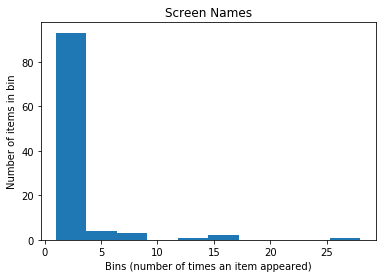

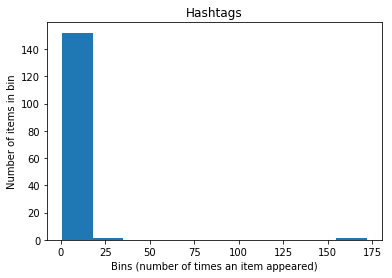

In [13]:
import matplotlib.pyplot as plt

bins=[0, 10, 20, 30, 40, 50, 100]

# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

for label, data in (('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()
plt.show()




 ** (4) Getting "All" friends and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [50]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from requests.exceptions import Timeout, ConnectionError
from requests.packages.urllib3.exceptions import ReadTimeoutError
import pandas as pd

def follow(userName): 
    i=0
    x=0

    users=tweepy.Cursor(api.followers, screen_name=userName,count=200).items()
    while True:
            try:
                x=x+1
                user=next(users)
                i=i+1
                
                print ( user.id_str + " @" +  user.screen_name)
                followers.append([user.id_str, user.screen_name])
                
                if x>19:
                    x=0
                    break
                    
                if x>2900:
                    x=0
                    time.sleep(15*60)
            
            except (tweepy.TweepError) as ex:
                time.sleep(60*16)
                pass
            
            except (StopIteration):
                break

#Following Caro_Kinkead
userName = "Caro_Kinkead"

followers=[]
oauth_login()
follow(userName)


620381863 @SPSResources
707035575283359744 @writersboon
247714773 @emilyekmurdoch
2964154987 @skyeknightwrite
1697876713 @Kevin_T_Johns
797293933655101440 @JennaCole28
18737153 @Maria_56
825800997503066112 @Susan_adamm
2203142774 @lazy_liza_k
2262276302 @webhostfive
91460306 @ShoutoutNetwork
45496908 @mindstirmedia
1323203894 @louisesbay
3522206002 @JimTacon
3273528815 @girltripping
809819942279221248 @TrumpGrill
817756731266789380 @kristiepgkn
2560087831 @DavidJRogersFTW
2986338605 @Fitzroy_Books
2497336783 @AReeceAuthor


In [51]:
# Printing name of followers
Userfollowers=pd.DataFrame(followers, columns=['ID','Screen_Name'])

Userfollowers

,ID,Screen_Name
0,620381863,SPSResources
1,707035575283359744,writersboon
2,247714773,emilyekmurdoch
3,2964154987,skyeknightwrite
4,1697876713,Kevin_T_Johns
5,797293933655101440,JennaCole28
6,18737153,Maria_56
7,825800997503066112,Susan_adamm
8,2203142774,lazy_liza_k
9,2262276302,webhostfive


In [52]:
#Nate Silver first 20 followers
import twitter
import time


def friends(userName):
    x = 0
    try:
        i=0
        for user in tweepy.Cursor(api.friends, screen_name=userName,count=20).items():
            
            print (user.id_str + " @" + user.screen_name)
            
            friendList.append([user.id_str , user.screen_name])
            
            x += 1
                        
            if x > 20:
                    break      
    except tweepy.TweepError:
            print (tweepy.TweepError)


friendList = []
friends(userName)

247714773 @emilyekmurdoch
2964154987 @skyeknightwrite
18737153 @Maria_56
12958802 @TrishB
8446712 @angelajames
1323203894 @louisesbay
822517901294845953 @HalfOnionInABag
2232280765 @vellum180g
15226433 @SmartBitches
14051989 @sarahmaclean
2497336783 @AReeceAuthor
1962096056 @Pacemakr
2897938046 @CollectorCorps
15567729 @VictoriaDahl
15379597 @FluffyKira
15587189 @mostlybree
797869498757955589 @tinycarebot
1152151308 @FWSMedia
289342771 @laurenduca
30317113 @HarryHunsicker
218325695 @Bencjacobs


In [53]:
# Printing name of followers friend
Natefollowers=pd.DataFrame(friendList, columns=['ID','Screen_Name'])

Natefollowers[1:20]

,ID,Screen_Name
1,2964154987,skyeknightwrite
2,18737153,Maria_56
3,12958802,TrishB
4,8446712,angelajames
5,1323203894,louisesbay
6,822517901294845953,HalfOnionInABag
7,2232280765,vellum180g
8,15226433,SmartBitches
9,14051989,sarahmaclean
10,2497336783,AReeceAuthor


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [ ]:

# ---------------------------------------------
#
# Our solution is to fetch tweets from twitter using various hashtags relevant to particular occasions. 
# Using those tweets we will be searching for a certain keyword and look for the frequency of those keywords. 
# These keywords will be filtered according to a certain category of gift and graphs and charts will be plotted accordingly 
# to visualize information of which gifts are preferred most for a particular location.
#
# ---------------------------------------------


Write codes to implement the solution in python:

In [2]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# ---------------------------------------------
#
# After the data was collected in the csv file. 
# We used Tableau to figure out the buying pattern for different occasion  
#
# ---------------------------------------------









# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# ---------------------------------------------
#
# After Analyzing the data from Tableau, following are the result that we got
# 
# +--------------------------+-------+
# | Valentines Day           | Count |
# +--------------------------+-------+
# | ValentinesDay            |   350 |
# | Love                     |    74 |
# | Coupons                  |   350 |
# | Jewelry                  |    28 |
# | Travel                   |    24 |
# | Chocolate                |    21 |
# | Watch                    |    16 |
# | Handcrafted              |    15 |
# | HomeDecor                |    12 |
# | Wine                     |    10 |
# +--------------------------+-------+



# +--------------------------+-------+
# | Christmas                | Count |
# +--------------------------+-------+
# | Christmas2016            |   314 |
# | Travel                   |    48 |
# | travel                   |    42 |
# | ChristmasFashion         |    36 |
# | GiftCard                 |    29 |
# | HomeDecor                |    51 |
# | Car                      |    25 |
# | Music                    |    23 |
# | XBoxOneS                 |    22 |
# +--------------------------+-------+


# +--------------------------+-------+
# | Thanksgiving             | Count |
# +--------------------------+-------+
# | Thanksgiving             |   366 |
# | Discount                 |   450 |
# | Food                     |    78 |
# | Turkey                   |    71 |
# | FamilyTravel             |    64 |
# | Camera                   |    42 |
# | Wine                     |    39 |
# | Car                      |    38 |
# | Dress                    |    36 |
# | Decoration               |    26 |
# +--------------------------+-------+

# ---------------------------------------------


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 1".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (5 points) how well did the team describe the problem they are trying to solve using twitter data? 
       0: not clear
       1: I can barely understand the problem
       2: okay, can be improved
       3: good, but can be improved
       4: very good
       5: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection:
    ----------------------------------
    
    3. (10 points) Do you think the data collected are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale (> 300 tweets)
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    (1) Word Count (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular tweets in your collection of tweets: (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (3) Find popular twitter entities  (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    (4) Find user's followers and friends (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? 
       0: not relevant
       1: barely relevant to the problem
       2: okay solution, but there is an easier solution.
       3: good, but can be improved
       4: very good, but solution is simple/old
       5: innovative and technically sound
       
    7. how well did the team implement the solution in python? 
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think the results they found in the data? 
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  
       -1: I vote the other team is better than this team
        0: the same
        1: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9
       10: Team 10

